In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

In [2]:
# Import the dataset and encode the date
df = pd.read_csv("/Users/salonikhanna/Desktop/FINAL PROJECT/XRP_USD_2018-06-01_2021-08-01-CoinDesk.csv") 
print(df.Price.shape)

(1157,)


In [3]:
# We will predict the prices for 50 days, so splitting the data accordingly
prediction_days = 50
df_train= df.Price[:len(df.Price)-prediction_days]
df_test= df.Price[len(df.Price)-prediction_days:]

In [4]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [5]:
# Some preprocessing, like normalizing the values, reshaping, etc. The data is a time series data, so the output to every instance is the next instance. 
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [6]:
# Initialising
regressor2 = Sequential()

# Adding the GRU layer
regressor2.add(GRU(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the GRU using Adam optimizer and MSE loss
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the GRU to the Training set
regressor2.fit(X_train, y_train, batch_size = 15, epochs = 50)

2021-10-28 14:20:14.356730: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-28 14:20:14.536267: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
74/74 [==============================] - 2s 2ms/step - loss: 0.0231
Epoch 2/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 3/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 4/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 5/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 8/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 9/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 10/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 11/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 12/50
74/74 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 13/50
74/74 [==============================

In [7]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
# Prediction from the trained GRU network
predicted_XRP_price = regressor2.predict(inputs)
predicted_XRP_price = sc.inverse_transform(predicted_XRP_price)
er2 = np.mean((predicted_XRP_price-test_set)**2)
print("Mean Square Error (MSE) using GRU:", er2)

Mean Square Error (MSE) using GRU: 0.01654884304313523


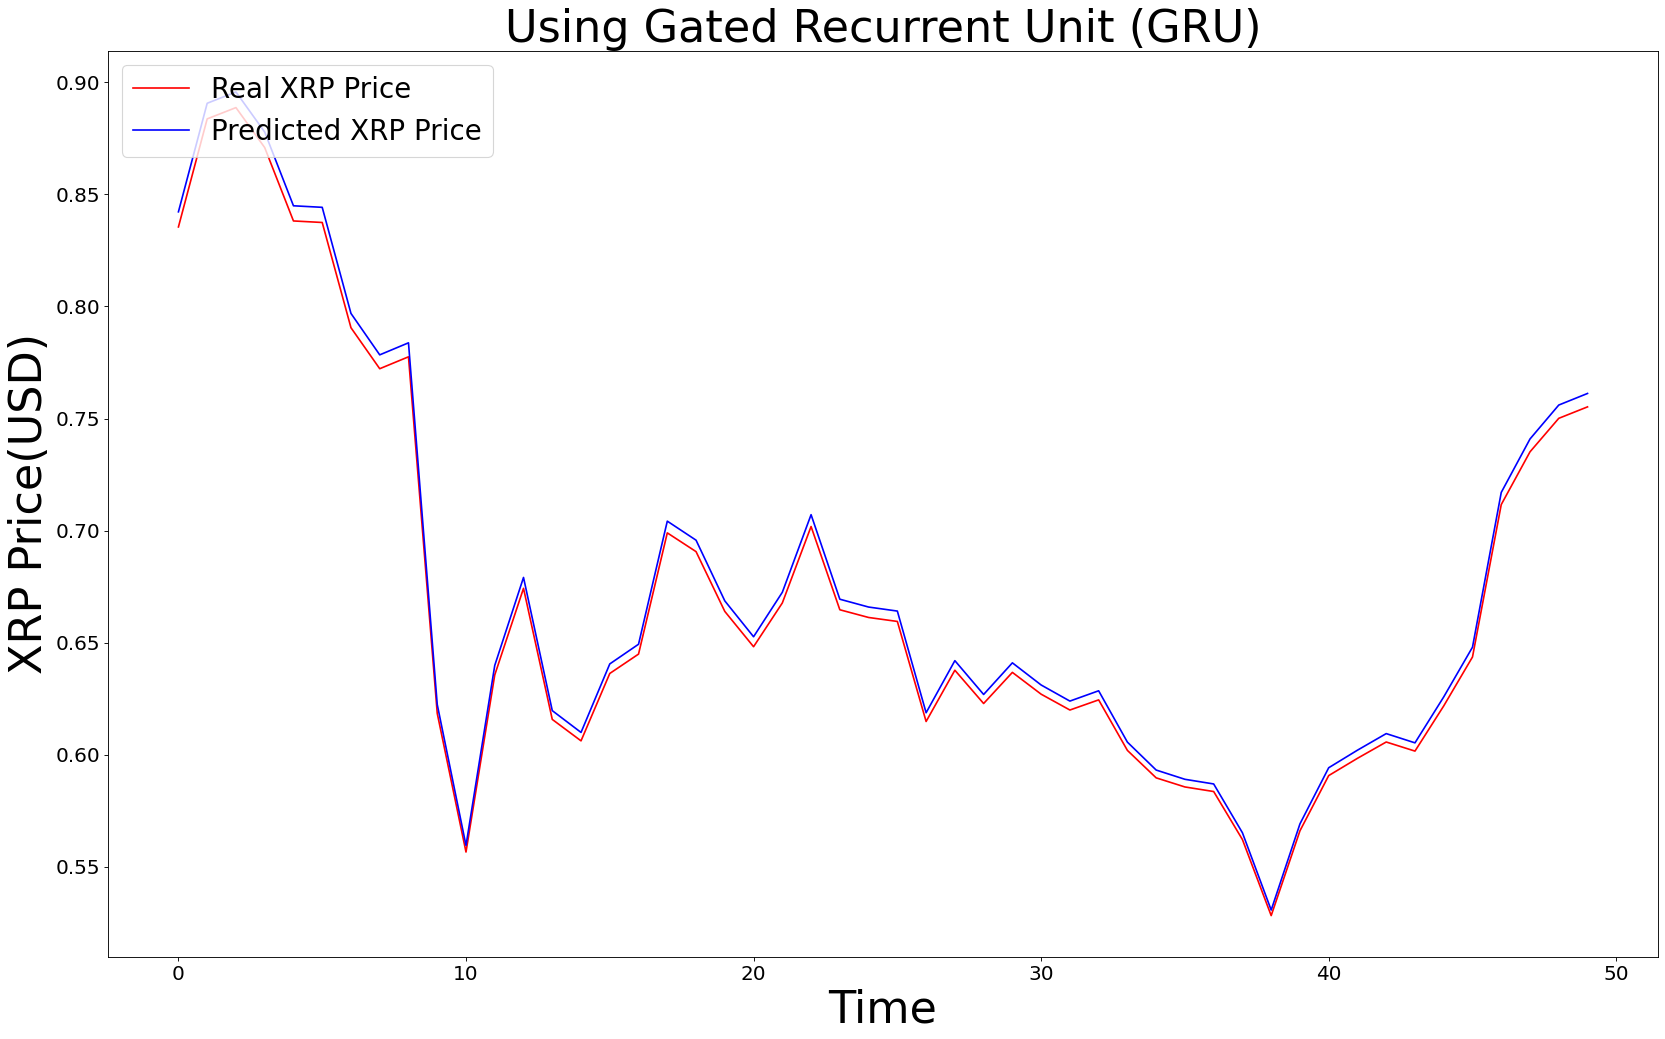

In [8]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real XRP Price')
plt.plot(predicted_XRP_price, color = 'blue', label = 'Predicted XRP Price')
plt.title('Using Gated Recurrent Unit (GRU)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df['Date']
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('XRP Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [9]:
predicted_XRP_price

array([[0.8422537 ],
       [0.8907122 ],
       [0.895757  ],
       [0.87786645],
       [0.8449507 ],
       [0.8442656 ],
       [0.7969033 ],
       [0.778415  ],
       [0.78378576],
       [0.62236136],
       [0.5594399 ],
       [0.63979673],
       [0.67906356],
       [0.6196216 ],
       [0.6098889 ],
       [0.640467  ],
       [0.64925194],
       [0.7041917 ],
       [0.6956956 ],
       [0.6686012 ],
       [0.6525962 ],
       [0.6724394 ],
       [0.7070771 ],
       [0.6693484 ],
       [0.66585374],
       [0.66405565],
       [0.61867374],
       [0.6419256 ],
       [0.62683165],
       [0.6409507 ],
       [0.6310642 ],
       [0.6238795 ],
       [0.6284789 ],
       [0.6055558 ],
       [0.5930999 ],
       [0.5889691 ],
       [0.5868922 ],
       [0.5650998 ],
       [0.53060585],
       [0.56907135],
       [0.5941291 ],
       [0.60196763],
       [0.6093666 ],
       [0.6052404 ],
       [0.6257465 ],
       [0.64793324],
       [0.71700263],
       [0.740